# 1. 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv(
    "./data/서울특별시 공공자전거 이용정보(월별)_25.7-12.csv",
    encoding="CP949"
)

df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,NaN,20대,68,5353.58,51.93,224057.74,1849
1,202507,102,102. 망원역 1번출구 앞,일일권,NaN,30대,65,6345.95,54.21,233558.04,1773
2,202507,102,102. 망원역 1번출구 앞,일일권,NaN,40대,11,378.59,3.54,15314.12,122
3,202507,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,169.09,1.46,6287.07,100
4,202507,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,69.20,0.42,1820.25,9


# 2. 데이터 정보확인하기

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  int64  
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.9+ MB


## 1) 결측치 확인

In [30]:
# 데이터는 몇 개이고, 몇개의 컬럼?
row,ncol = df.shape
print(f"따릉이 데이터는 {row:,}개의 행과 , {ncol:,}개의 열이 있습니다.")

따릉이 데이터는 629,975개의 행과 , 11개의 열이 있습니다.


In [31]:
# 대여일자를 int가아닌 str로 바꾸기
df["대여일자"] = df["대여일자"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 52.9+ MB


In [32]:
df.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,2441.959981,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,1649.317268,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1018.000000,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,2119.000000,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,3956.000000,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,6190.000000,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


In [33]:
# 대여소 번호는 수치형으로 통계에 합당하지 않으무로 형변환
df["대여소번호"] = df["대여소번호"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  object 
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ MB


In [34]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


## 2) 데이터 형변환

In [8]:
pd.to_datetime(df["대여일자"],format="%Y%m")

0        2025-07-01
1        2025-07-01
2        2025-07-01
3        2025-07-01
4        2025-07-01
            ...    
629970   2025-12-01
629971   2025-12-01
629972   2025-12-01
629973   2025-12-01
629974   2025-12-01
Name: 대여일자, Length: 629975, dtype: datetime64[ns]

## 3) 결측치 확인

In [35]:
df.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         192788
연령대코드           0
이용건수            0
운동량           583
탄소량           583
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [10]:
# 결측치가 왜 발생 했을까?
## 성별 - 필수 입력이 아니라 발생 ( 결측치 other 로 대체 )
## 운동량 / 탄소량 : 분석목표에 큰의미 없어서 그냥 둠

In [36]:
df["성별"].value_counts()

성별
M    233282
F    203831
m        50
f        24
Name: count, dtype: int64

In [37]:
df.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         192788
연령대코드           0
이용건수            0
운동량           583
탄소량           583
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [38]:
# 성별을 모두 대문자로, 기타인경우 O
df["성별"] = df["성별"].str.upper()
df["성별"] = df["성별"].fillna("O") # 결측치 other 로 대체

In [14]:
df["성별"].value_counts()

성별
M    233332
F    203855
O    192788
Name: count, dtype: int64

## 4) 이상치 파악 및 처리

In [39]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


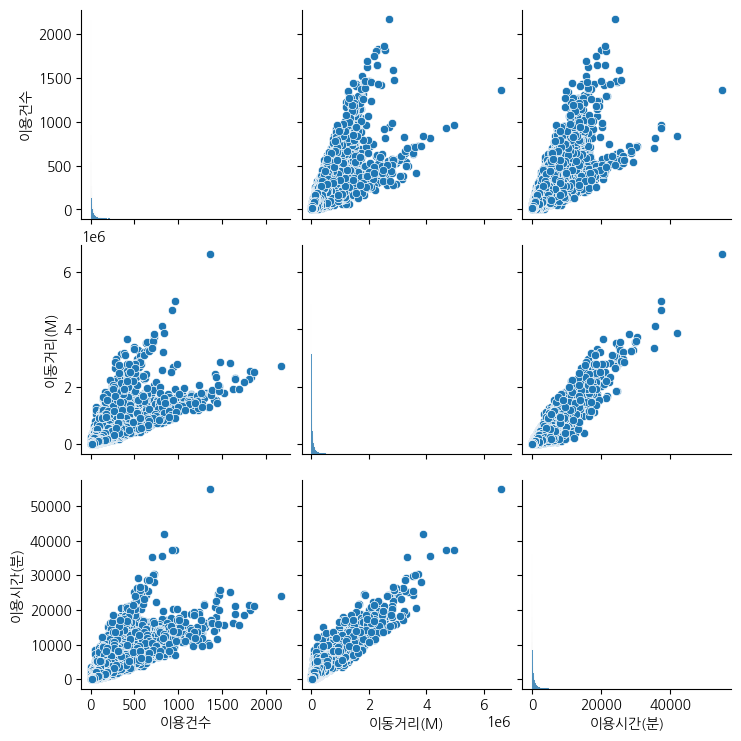

In [2]:
# pair plot

import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    df[["이용건수","이동거리(M)","이용시간(분)"]],
    diag_kind="hist"
)

plt.show()

In [41]:
# 정렬 sort_values(by=[],ascending=)
# 정렬 (이용건수 기준 내림차순 TOP 10)

df.sort_values(by=["이용건수"],ascending=False).head(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
276982,202509,2715,2715.마곡나루역 2번 출구,정기권,M,30대,2168,76889.56,624.19,2715682.23,23859
277453,202509,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1865,71451.56,576.87,2510370.54,21061
64566,202507,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1834,65265.70,529.31,2334817.28,20832
65013,202507,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1814,70722.91,584.47,2549397.49,20055
169573,202508,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1803,64036.40,520.28,2259446.80,21484
386004,202510,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1754,61534.06,499.32,2167739.63,18508
495019,202511,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1696,55766.71,447.41,1935361.44,15692
276974,202509,2715,2715.마곡나루역 2번 출구,정기권,F,30대,1650,52725.48,521.68,2275567.17,21203
170019,202508,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1649,64933.22,529.69,2293112.91,18931
494573,202511,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1626,55754.03,446.61,1931219.79,16138


In [18]:
df.sort_values(by=["이용건수"],ascending=False).tail(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9
629950,202512,6190,6190.마곡광장(마곡나루역 5번출구),일일권,M,60대,1,46.30,0.34,1461.47,13
629949,202512,6190,6190.마곡광장(마곡나루역 5번출구),일일권,M,50대,1,183.41,1.19,5146.14,55


In [19]:
# 정렬 (이동거리 기준 내림차순 TOP 10)
df.sort_values(by=["이동거리(M)"],ascending=False).head(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
315726,202509,5515,5515.한강버스 망원 선착장,일일권,M,20대,960,135447.46,1141.03,4967456.01,37136
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241
314071,202509,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,813,97350.27,948.21,4116458.49,35587
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836
315711,202509,5515,5515.한강버스 망원 선착장,일일권,O,20대,722,93338.95,880.59,3824483.13,27903
83807,202507,4217,4217. 한강공원 망원나들목,일일권,F,20대,726,88431.04,860.74,3711720.19,30388
425041,202510,5651,5651.한강버스 옥수 선착장,정기권,M,50대,416,103360.19,838.68,3643277.08,20476
223331,202509,502,502. 자양(뚝섬한강공원)역 1번출구 앞,일일권,F,20대,707,85000.21,832.74,3589150.05,30090
205726,202508,5153,5153.한강버스 뚝섬 선착장,일일권,M,20대,647,97167.37,819.09,3551873.47,25520


In [20]:
df.sort_values(by=["이동거리(M)"],ascending=False).tail(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
619169,202512,4686,4686. 우물골 근린공원,일일권,F,30대,1,0.0,0.0,0.0,2
619184,202512,4686,4686. 우물골 근린공원,정기권,F,~10대,1,0.0,0.0,0.0,2
515731,202511,4306,4306. 서래공원 앞,가족권,F,~10대,1,0.0,0.0,0.0,37
616055,202512,4542,4542. 월정초 사거리,일일권,F,~10대,1,0.0,0.0,0.0,57
1793,202507,159,159. 이대역 4번 출구,일일권,F,~10대,1,0.0,0.0,0.0,5
586985,202512,2307,2307. 압구정 한양 3차 아파트,정기권,F,~10대,1,0.0,0.0,0.0,2
12050,202507,479,479.동대입구역 3번 출구,정기권,F,기타,1,NaN,NaN,0.0,20
600876,202512,3618,3618. 서울율현초교 삼거리,일일권,F,50대,1,0.0,0.0,0.0,47
420507,202510,4913,4913. 레베쌍트 빌딩 앞,일일권,F,40대,1,0.0,0.0,0.0,2
617633,202512,4604,4604. 원효로다목적체육관 앞,일일권(3시간),M,~10대,1,0.0,0.0,0.0,1


In [21]:
# 정렬 (이용시간(분) 기준 내림차순 TOP 10)
df.sort_values(by=["이용시간(분)"],ascending=False).head(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241
315726,202509,5515,5515.한강버스 망원 선착장,일일권,M,20대,960,135447.46,1141.03,4967456.01,37136
314071,202509,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,813,97350.27,948.21,4116458.49,35587
427421,202510,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,704,85522.48,770.99,3330263.54,35131
83807,202507,4217,4217. 한강공원 망원나들목,일일권,F,20대,726,88431.04,860.74,3711720.19,30388
223331,202509,502,502. 자양(뚝섬한강공원)역 1번출구 앞,일일권,F,20대,707,85000.21,832.74,3589150.05,30090
205719,202508,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,708,82830.75,809.11,3537991.64,29695
107627,202508,207,207. 여의나루역 1번출구 앞,일일권,F,20대,541,77368.62,753.61,3285101.91,29082


In [22]:
df.sort_values(by=["이용시간(분)"],ascending=False).tail(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
353174,202510,1240,1240. 문정 법조단지4,정기권,F,70대이상,1,0.00,0.00,0.00,0
484391,202511,2227,2227.방배열린문화센터 앞,일일권(3시간),M,20대,1,0.00,0.00,0.00,0
61006,202507,2518,2518. 서초동 현대아파트 앞,일일권,O,40대,1,0.00,0.00,0.00,0
342143,202510,844,844. 이촌2동 동원베네스트 아파트 앞,정기권,F,70대이상,1,3.26,0.03,111.20,0
116400,202508,479,479.동대입구역 3번 출구,정기권,M,70대이상,1,36.58,0.33,1421.27,0
156880,202508,2096,2096.서울특별시 동작관악교육지원청,정기권,M,20대,1,6.18,0.06,260.00,0
349587,202510,1130,1130. 화곡본동시장 버스정류장,일일권,F,40대,1,4.79,0.05,220.00,0
345099,202510,974,974.연신초등학교옆 마을마당,일일권,F,~10대,1,2.87,0.03,111.33,0
506577,202511,3793,3793. 더리브골드타워,일일권,O,50대,1,37.22,0.26,1105.62,0
277013,202509,2716,2716.롯데 R&D 센터,정기권,F,70대이상,1,42.61,0.38,1655.54,0


In [23]:
# 이상치가 정말로 이상한가?
## 이용건수가 남들보다 많은사람이 더 큰값을 갖는다
## 건당 이동걸,건당 이용시간 필요

## 5) 파생변수 생성

In [42]:

#건당 이동거리, 건당 이용시간의 히스토 그램
df["건당 이동 거리(M)"] = df["이동거리(M)"] /df["이용건수"] 
df["건당 이용시간(분)"] = df["이용시간(분)"] / df["이용건수"]

df.head()
# sns.pairplot(
#     df["건당 이동거리(M)","건당 이용시간(분)"]
# )
# plt.show()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [43]:
df.to_csv(
    "./data/따릉이_월별병보_전처리_데이터_(25_7)12.csv",
    index=False
)

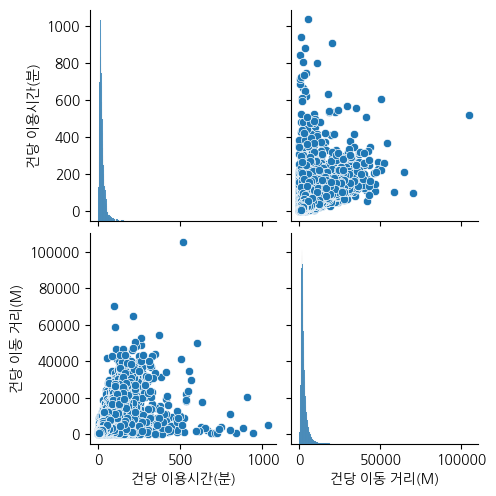

In [46]:
sns.pairplot(
    df2[["건당 이용시간(분)","건당 이동 거리(M)"]],
    diag_kind="hist"
)

plt.show()

## 전처리 데이터 저장

In [ ]:
df.to_csv(
    "./data/따릉이_월별병보_전처리_데이터_(25_7)12.csv",
    index=False
)

In [3]:
df2 = pd.read_csv(
    "./data/따릉이_월별병보_전처리_데이터_(25_7)12.csv"
)
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


# 3. 데이터 탐색하기

## 1) 변수별로 특징 파악하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   대여일자         629975 non-null  object 
 1   대여소번호        629975 non-null  object 
 2   대여소명         629975 non-null  object 
 3   대여구분코드       629975 non-null  object 
 4   성별           629975 non-null  object 
 5   연령대코드        629975 non-null  object 
 6   이용건수         629975 non-null  int64  
 7   운동량          629392 non-null  float64
 8   탄소량          629392 non-null  float64
 9   이동거리(M)      629975 non-null  float64
 10  이용시간(분)      629975 non-null  int64  
 11  건당 이동 거리(M)  629975 non-null  float64
 12  건당 이용시간(분)   629975 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ MB


In [ ]:
mon_df = df2["대여일자"].value_counts()
mon_df.head()

대여일자
202510    109286
202509    108768
202511    108310
202508    106089
202507    104205
Name: count, dtype: int64

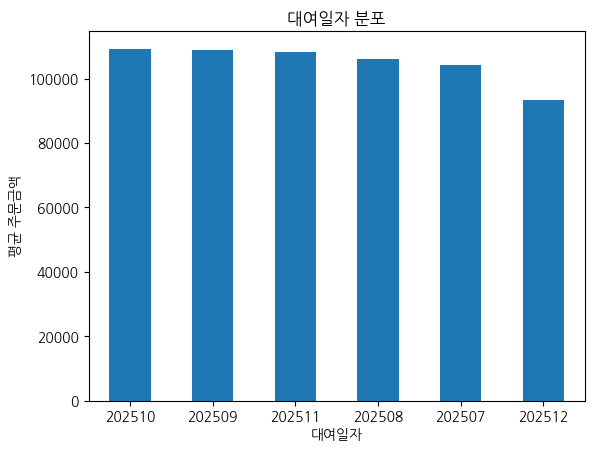

In [ ]:
# 대여일자, 몇월에 가장 많이 따릉이가 이용 되었을까
# plt.hist(mon_df, bins=20, edgecolor="black")
# plt.title("대여일자 분포")
# plt.xlabel("대여일자")
# plt.ylabel("이용건수")
# plt.show()

mon_df.plot(kind="bar")
plt.title("대여일자 분포")
plt.ylabel("평균 주문금액")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

In [ ]:
# 대여소, 사람들이 가장많이 이용하는 장소는?
df2.head(1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176


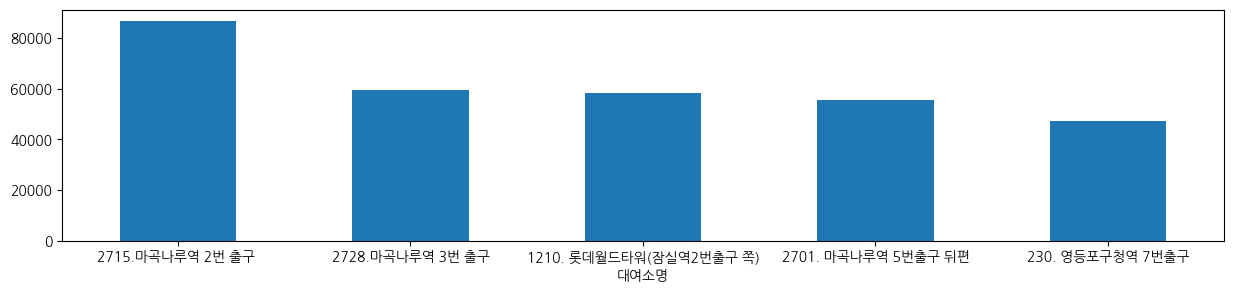

In [48]:
#df2["대여소명"].value_counts().sort_values(ascending=True).head(10)
loc_df2_sum = df2.groupby("대여소명")["이용건수"].sum().sort_values(ascending=False).head(5)
#print(loc_df2_sum)
plt.figure(figsize=(15,3))
loc_df2_sum.plot(kind="bar")
plt.title="사람들이 가장 많이 찾는 이용소"
plt.ylabel="이용건수"
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


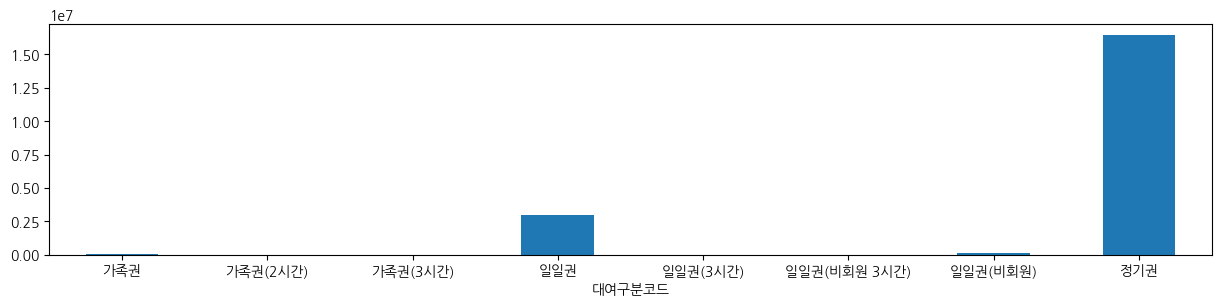

In [ ]:
#  대여구분코드, 사람들은 어떤유형의 대여를 하는가
df2["대여구분코드"].value_counts()

group_rent_df = df2.groupby("대여구분코드")["이용건수"].sum()
plt.figure(figsize=(15,3))
group_rent_df.plot(kind="bar")
plt.title="대여 구분별 통계"
plt.ylabel="이용건수"
plt.xticks(rotation=0)
plt.show()

TypeError: 'str' object is not callable

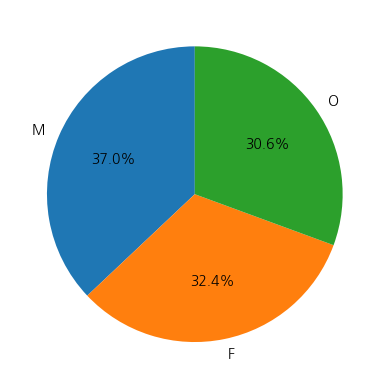

In [49]:
# 성별, 은 어떻게 이루어져 있는가
sex_Per = df2["성별"].value_counts()

plt.pie(
    sex_Per,
    labels=sex_Per.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("성별 비율")
plt.show()

In [ ]:
# 연령대, 어떻게 이루어져 있는가

In [ ]:
# 건당 이동거리 분포는?

## 2) 그룹별로 특징 파악하기

TypeError: 'str' object is not callable

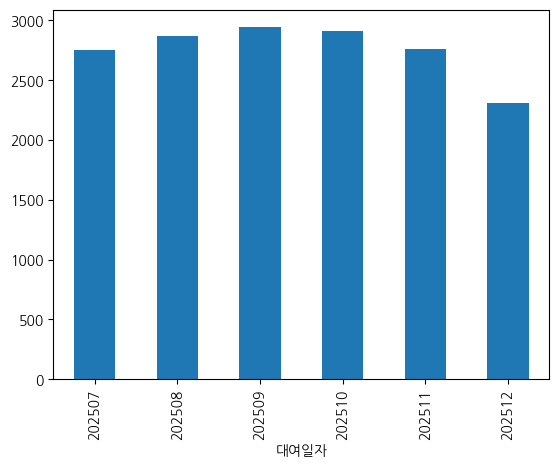

In [50]:
# 월별로 이동거리에 차이가 있는가
m_dist_sum = df2.groupby("대여일자")["건당 이동 거리(M)"].mean()
m_dist_sum.plot(kind="bar")
plt.title("대여일자별 평균 이동거리")
plt.ylabel("평균 이동거리")
plt.xticks(rotation=1) # x축 라벨 회전
plt.show()

In [ ]:
df2["대여소명"].value_counts().head(10)

대여소명
583. 청계천 생태교실 앞            327
502. 자양(뚝섬한강공원)역 1번출구 앞    325
186. 월드컵공원                 322
2622. 올림픽공원역 3번출구          321
4217. 한강공원 망원나들목           320
272. 당산육갑문                 319
419. 홈플러스 마포점 앞            318
420. 서울시 공공자전거 상암센터        315
3511. 응봉역 1번출구             313
780.신정교 하부                 313
Name: count, dtype: int64

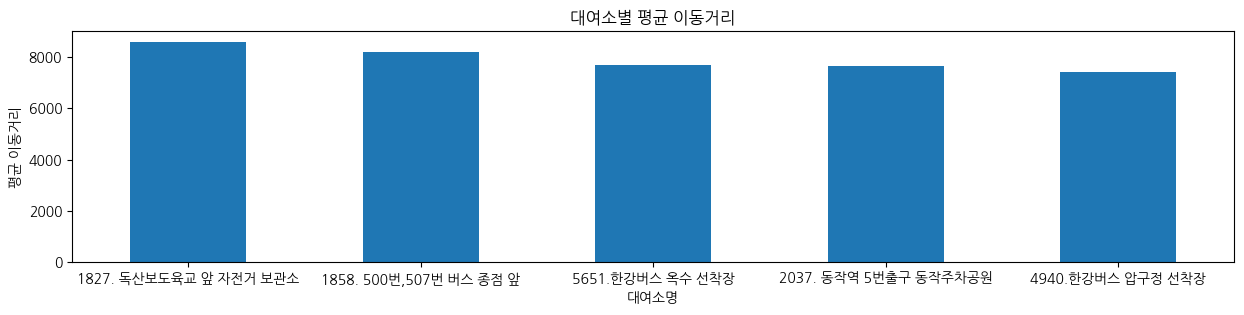

In [ ]:
# 대여소별로 이동거리에 차이가 있는가
m_dist_sum = df2.groupby("대여소명")["건당 이동 거리(M)"].mean().sort_values(ascending=False).head()
#.head()# sort_values(by=["건당 이동 거리(M)"],ascending=False)
plt.figure(figsize=(15,3))
m_dist_sum.plot(kind="bar")
plt.title("대여소별 평균 이동거리")
plt.ylabel("평균 이동거리")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

In [27]:
# 연령대 별로 이용거리에 차이가 있는가

m_use_sum = df2.groupby("연령대코드")["이용건수"].sum()

plt.figure(figsize=(15,3))
m_use_sum.plot(kind="bar")
plt.title("연령대별 이용건수")
plt.ylabel("이용건수")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

NameError: name 'df2' is not defined

In [ ]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [ ]:
# 연령별 이용 건수
m_dist_sum = df.groupby("연령대코드")["건당 이동 거리(M)"].mean()
plt.figure(figsize=(15,3))
m_dist_sum.plot(kind="bar")
plt.title("연령대별 평이용건수")
plt.ylabel("이용건수")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

TypeError: 'str' object is not callable

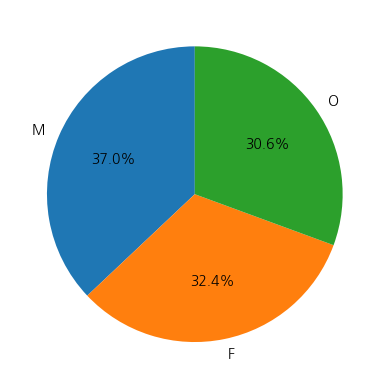

In [ ]:
# 성별로 이용거리에 차이가 있는가
ch_counts = df2["성별"].value_counts()

plt.pie(
    ch_counts,
    labels=ch_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("성별 비율")
plt.show()

## 3) 변수 별 관계 파악

In [ ]:
# 연령대 X 성별 분포
pivot_table1 = df2.pivot_table(
    values="건당 이동 거리(M)",
    index="연령대코드",
    columns="성별",
    aggfunc="mean"
)


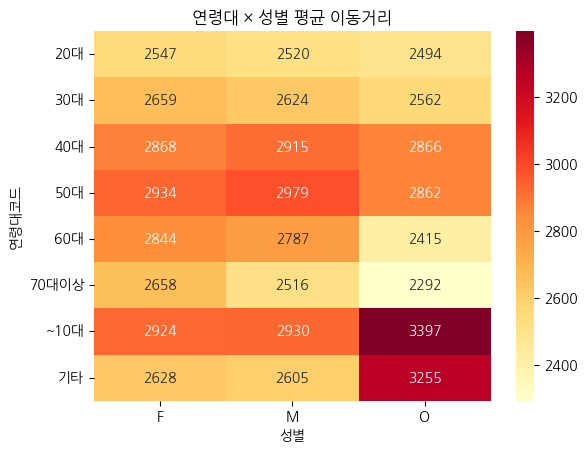

In [ ]:
sns.heatmap(
    pivot_table1,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("연령대 × 성별 평균 이동거리")
plt.show()

In [ ]:
# 대여일자 X 연령대
pivot_table2 = df2.pivot_table(
    values="건당 이동 거리(M)",
    index="대여일자",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table2

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여일자,,,,,,,,
202507,2560.922272,2588.076438,2849.336382,2875.555982,2632.892106,2448.361409,2944.946300,2910.115637
202508,2643.456828,2700.960030,2979.282390,3020.436965,2734.547603,2505.781111,3125.748838,3001.586632
202509,2701.553589,2809.331524,3090.978242,3097.061930,2829.337807,2675.184508,3039.859265,3103.037744
202510,2568.083811,2733.232429,3028.954752,3119.656623,2908.874682,2588.080964,3187.558345,3009.947378
202511,2525.212136,2660.498759,2903.025939,2920.440591,2658.752998,2488.415217,2896.923564,2828.374210
202512,2111.606345,2173.117934,2395.640900,2458.867265,2310.547739,2220.096798,2476.214386,2376.165508


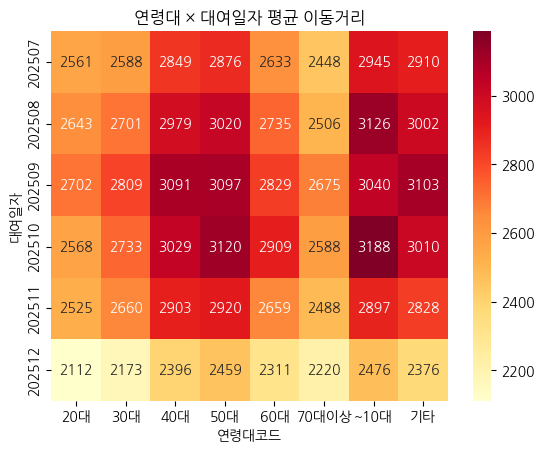

In [ ]:
sns.heatmap(
    pivot_table2,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("연령대 × 대여일자 평균 이동거리")
plt.show()

In [ ]:
# 대여소 X 연령대

# 4. 지도 시각화 실습

In [23]:
df2.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909


## 1) 대여소 정보 불러오기

In [27]:
loc_df = pd.read_csv(
    "./data/공공자전거 대여소 정보.csv"
)
loc_df.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [ ]:
# 어떤것을 가지고 올것인가
# loc_df["RENT_ID_NM"] , loc_df["STA_LAT"],loc_df["STA_LONG"]

In [26]:
# 어떤 데이터를 지도에 그릴 것인가?
# 대여소별로 건당 이동 거리(M) 0 2 그룹별요약
loc_dis_sum_5 = df2.groupby("대여소명")["건당 이동 거리(M)"].mean().sort_values(ascending=False).head()
loc_dis_sum_5


대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
Name: 건당 이동 거리(M), dtype: float64

In [32]:
# 필요한 열만 추출 RENT_ID_NM,STA_LAT,STA_LONG

loc_df[["RENT_ID_NM","STA_LAT","STA_LONG"]].head(3)

,RENT_ID_NM,STA_LAT,STA_LONG
0,108. 서교동 사거리,37.552746,126.918617
1,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729. 서부식자재마트 건너편,37.510380,126.866798


In [35]:
# 반복문을 통해서 대여소명, 평균 건당 이동 거리(M),위도, 경도 출력
# 반복변수 loc

for loc in loc_dis_sum_5.values : 
    print(loc)

8558.437960748619
8193.0873489451
7683.493070511286
7654.498967120714
7395.968325458602


In [47]:
#loc_df에서 RENT_ID_NM이 loc인 STA_LOC,STA_LONG를 출력
#loc_df.loc[]
for loc in loc_dis_sum_5.index : 
    print("loc:",loc)
    tem = loc_df.loc[loc_df["RENT_ID_NM"]==loc,["STA_LAT","STA_LONG"]]
    lat = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LAT"].values[0]
    long = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LONG"].values[0]
    print(lat)
    print("="*40)


loc: 1827. 독산보도육교 앞 자전거 보관소
37.45672607
loc: 1858. 500번,507번 버스 종점 앞
37.43727112
loc: 5651.한강버스 옥수 선착장
37.53970718
loc: 2037. 동작역 5번출구 동작주차공원
37.50318909
loc: 4940.한강버스 압구정 선착장
37.52643204


## 2) 지도 그려보기

In [19]:
# uv add folium
import folium
center = [37.5057138,127.1070689]
map = folium.Map(location=center,zoom_start=13)
map

In [ ]:
folium.Marker(
    location=center,
    icon=folium.Icon(color="red",icon="off"),
    popup="서울"
).add_to(map)
map
#지도에 Marker로 표시하고싶을때는 location과 popup에 넣을 데이터 필요

In [ ]:
#loc_df에서 RENT_ID_NM이 loc인 STA_LOC,STA_LONG를 출력
#loc_df.loc[]
for loc in loc_dis_sum_5.index : 
    print("loc:",loc)
    tem = loc_df.loc[loc_df["RENT_ID_NM"]==loc,["STA_LAT","STA_LONG"]]
    lat = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LAT"].values[0]
    long = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LONG"].values[0]
    print(lat)

    #지도 그리기
    folium.Marker(
        location=[lat,long],
        icon=folium.Icon(color="red",icon="off"),
        popup=loc
    ).add_to(map)
    
    #print("="*40)

loc: 1827. 독산보도육교 앞 자전거 보관소
37.45672607
loc: 1858. 500번,507번 버스 종점 앞
37.43727112
loc: 5651.한강버스 옥수 선착장
37.53970718
loc: 2037. 동작역 5번출구 동작주차공원
37.50318909
loc: 4940.한강버스 압구정 선착장
37.52643204


In [53]:
map